In [35]:
# 1. Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

# Unduh stopwords (cukup sekali saja)
nltk.download('stopwords')

# Atur agar plot Seaborn tampil lebih menarik
sns.set_theme(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df = pd.read_csv('../data/cheese_data.csv', delimiter=',')

In [37]:
# 1. Melihat 5 baris pertama data untuk mendapatkan gambaran
print("Lima baris pertama data:")
display(df.head())

# 2. Melihat 5 baris terakhir data
print("\nLima baris terakhir data:")
display(df.tail())

# 3. Mengecek dimensi data (jumlah baris, jumlah kolom)
print(f"\nDataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

# 4. Mendapatkan ringkasan teknis: nama kolom, jumlah data non-null, dan tipe data
print("\nInformasi teknis dataset (df.info()):")
df.info()

# 5. Mendapatkan statistik deskriptif untuk kolom numerik (rata-rata, std, min, max, kuartil)
print("\nStatistik deskriptif untuk kolom numerik:")
display(df.describe())

# 6. Mendapatkan statistik deskriptif untuk kolom kategorikal (jumlah unik, kategori teratas)
print("\nStatistik deskriptif untuk kolom kategorikal:")
display(df.describe(include=['object', 'category']))

# 7. Menghitung jumlah nilai yang hilang (missing values) per kolom
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Lima baris pertama data:


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat



Lima baris terakhir data:


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
1037,2387,NS,Farmstead,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",Fresh curds through a variety of added Organic...,1,Hard Cheese,Cow,Pasteurized,NaN,Knoydart,higher fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat
1039,2389,NS,Artisan,40.0,Grassy tang and restrained saltiness that refl...,NaN,0,Veined Cheeses,Ewe,Thermised,NaN,Electric Blue,higher fat
1040,2390,NS,Artisan,34.0,Sweet and tangy flavours combine with hoppy no...,NaN,0,Semi-soft Cheese,Ewe,Thermised,Washed Rind,Hip Hop,higher fat
1041,2391,AB,Artisan,31.5,"Available in different flavor: original, herb ...",Soft Squeaky Fresh Cheese.,0,Fresh Cheese,Cow,Pasteurized,No Rind,Super Fresh Cheese Curds,higher fat



Dataset ini memiliki 1042 baris dan 13 kolom.

Informasi teknis dataset (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
m

,CheeseId,MoisturePercent,Organic
count,1042.000000,1028.000000,1042.000000
mean,1560.633397,47.069747,0.095010
std,451.811164,9.592647,0.293369
min,228.000000,12.000000,0.000000
25%,1280.250000,40.000000,0.000000
50%,1548.500000,46.000000,0.000000
75%,1901.750000,52.000000,0.000000
max,2391.000000,92.000000,1.000000



Statistik deskriptif untuk kolom kategorikal:


,ManufacturerProvCode,ManufacturingTypeEn,FlavourEn,CharacteristicsEn,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,1042,1042,801,643,1019,1041,977,721,1042,1042
unique,10,3,635,535,6,8,3,4,1038,2
top,QC,Industrial,Mild,Creamy,Firm Cheese,Cow,Pasteurized,No Rind,Boerenkaas,lower fat
freq,796,455,59,19,349,743,800,404,2,684



Jumlah nilai yang hilang per kolom:
CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64


In [38]:
# Menampilkan seluruh baris yang memiliki CheeseName duplikat
duplicate_rows = df[df.duplicated(subset='CheeseName', keep=False)]

# Menampilkan hasilnya
duplicate_rows


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
70,823,BC,Artisan,43.0,NaN,NaN,0,Firm Cheese,Cow,Pasteurized,NaN,Boerenkaas,higher fat
694,1759,QC,Artisan,36.0,"Cream, hazelnut, flowers and smoky flavor","Pressed and cooked, golden to copper-colored rind",1,Firm Cheese,Cow,Raw Milk,NaN,Ménestrel (Le),higher fat
907,2088,BC,Artisan,43.0,Available smoked,NaN,0,Firm Cheese,Cow,NaN,NaN,Boerenkaas,higher fat
928,2137,QC,Farmstead,36.0,NaN,NaN,0,Firm Cheese,Cow,Pasteurized,No Rind,Ménestrel (Le),higher fat
947,2273,NB,Farmstead,50.0,Mild taste becoming stronger with age.,NaN,0,Firm Cheese,Goat,Pasteurized,No Rind,Cheddar,lower fat
948,2274,NB,Farmstead,50.0,Light and salty.,NaN,0,Fresh Cheese,Goat,Pasteurized,No Rind,Fromage en grain,lower fat
967,2293,QC,Farmstead,39.0,NaN,NaN,1,Hard Cheese,Cow,NaN,No Rind,Cheddar,higher fat
995,2328,QC,Artisan,41.0,Lightly salted,NaN,0,Fresh Cheese,Cow,Pasteurized,No Rind,Fromage en grain,higher fat


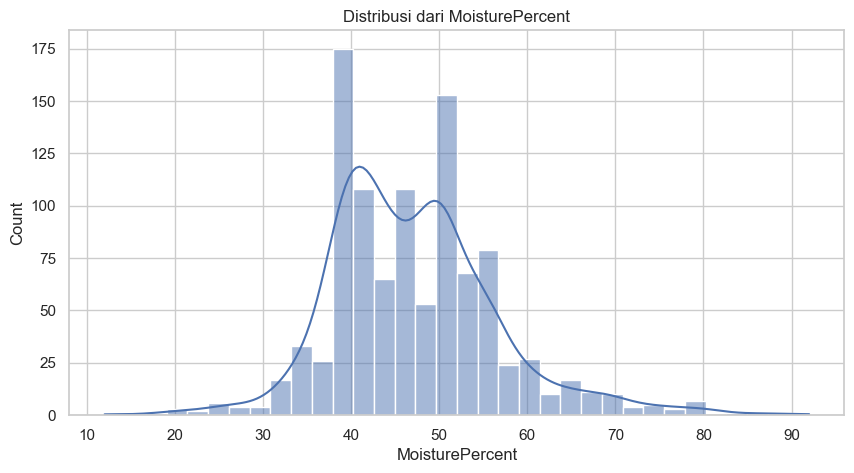

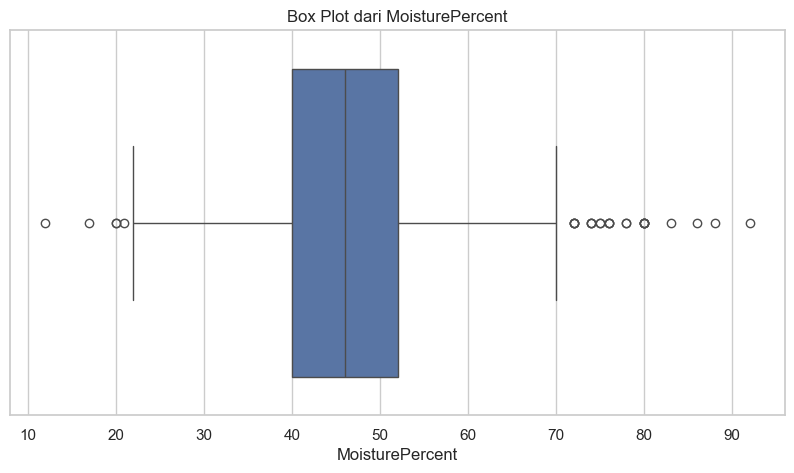

In [39]:
# numerik
nama_kolom_numerik = 'MoisturePercent' 

# 1. Visualisasi distribusi dengan Histogram dan KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=nama_kolom_numerik, kde=True)
plt.title(f'Distribusi dari {nama_kolom_numerik}')
plt.show()

# 2. Visualisasi dengan Box Plot untuk melihat sebaran data dan outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=nama_kolom_numerik)
plt.title(f'Box Plot dari {nama_kolom_numerik}')
plt.show()

# Lower Fat

In [40]:
# Filter hanya data dengan FatLevel = 'lower fat'
lower_fat_df = df[df['FatLevel'] == 'lower fat']

# 1. Melihat 5 baris pertama data
print("Lima baris pertama data (FatLevel = 'lower fat'):")
display(lower_fat_df.head())

# 2. Melihat 5 baris terakhir data
print("\nLima baris terakhir data (FatLevel = 'lower fat'):")
display(lower_fat_df.tail())

# 3. Mengecek dimensi data
print(f"\nDataset 'lower fat' memiliki {lower_fat_df.shape[0]} baris dan {lower_fat_df.shape[1]} kolom.")

# 4. Ringkasan teknis (info)
print("\nInformasi teknis dataset 'lower fat' (df.info()):")
lower_fat_df.info()

# 5. Statistik deskriptif kolom numerik
print("\nStatistik deskriptif kolom numerik (FatLevel = 'lower fat'):")
display(lower_fat_df.describe())

# 6. Statistik deskriptif kolom kategorikal
print("\nStatistik deskriptif kolom kategorikal (FatLevel = 'lower fat'):")
display(lower_fat_df.describe(include=['object', 'category']))

# 7. Jumlah nilai yang hilang per kolom
print("\nJumlah nilai yang hilang per kolom (FatLevel = 'lower fat'):")
print(lower_fat_df.isnull().sum())

# 8. Modus (nilai paling sering muncul) untuk tiap kolom
print("\nModus untuk setiap kolom (FatLevel = 'lower fat'):")
display(lower_fat_df.mode().iloc[0])



Lima baris pertama data (FatLevel = 'lower fat'):


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat



Lima baris terakhir data (FatLevel = 'lower fat'):


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
1033,2383,NB,Farmstead,50.0,Mild and creamy taste,Ashed cheese with maritime pine ashes,0,Soft Cheese,Goat,Pasteurized,NaN,Gavroche,lower fat
1034,2384,NB,Farmstead,50.0,Maple Hazelnut,Fresh goat ladle-molded,0,Soft Cheese,Goat,Pasteurized,NaN,Petit frais aux noix et sirop d'érable,lower fat
1035,2385,NB,Farmstead,50.0,pepper and garlic,Small aperitif cheese balls,0,Semi-soft Cheese,Goat,Pasteurized,NaN,Petits caprice,lower fat
1036,2386,NB,Farmstead,50.0,Unsweetened cranberry,Fresh goat ladle-molded,0,Fresh Cheese,Goat,Pasteurized,NaN,Petit frais aux canneberges,lower fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat



Dataset 'lower fat' memiliki 684 baris dan 13 kolom.

Informasi teknis dataset 'lower fat' (df.info()):
<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 1038
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              684 non-null    int64  
 1   ManufacturerProvCode  684 non-null    object 
 2   ManufacturingTypeEn   684 non-null    object 
 3   MoisturePercent       672 non-null    float64
 4   FlavourEn             531 non-null    object 
 5   CharacteristicsEn     431 non-null    object 
 6   Organic               684 non-null    int64  
 7   CategoryTypeEn        668 non-null    object 
 8   MilkTypeEn            684 non-null    object 
 9   MilkTreatmentTypeEn   643 non-null    object 
 10  RindTypeEn            478 non-null    object 
 11  CheeseName            684 non-null    object 
 12  FatLevel              684 non-null    object 
dtypes: float64(1), int64(2),

,CheeseId,MoisturePercent,Organic
count,684.000000,672.000000,684.000000
mean,1563.479532,50.527083,0.077485
std,432.919800,9.078335,0.267556
min,228.000000,20.000000,0.000000
25%,1321.500000,44.000000,0.000000
50%,1537.500000,50.000000,0.000000
75%,1873.000000,55.000000,0.000000
max,2388.000000,92.000000,1.000000



Statistik deskriptif kolom kategorikal (FatLevel = 'lower fat'):


,ManufacturerProvCode,ManufacturingTypeEn,FlavourEn,CharacteristicsEn,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,684,684,531,431,668,684,643,478,684,684
unique,9,3,424,366,6,8,3,4,684,1
top,QC,Industrial,Mild,Creamy,Soft Cheese,Cow,Pasteurized,No Rind,Sieur de Duplessis (Le),lower fat
freq,531,312,48,16,204,446,569,254,1,684



Jumlah nilai yang hilang per kolom (FatLevel = 'lower fat'):
CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          12
FlavourEn               153
CharacteristicsEn       253
Organic                   0
CategoryTypeEn           16
MilkTypeEn                0
MilkTreatmentTypeEn      41
RindTypeEn              206
CheeseName                0
FatLevel                  0
dtype: int64

Modus untuk setiap kolom (FatLevel = 'lower fat'):


CheeseId                            228
ManufacturerProvCode                 QC
ManufacturingTypeEn          Industrial
MoisturePercent                    50.0
FlavourEn                          Mild
CharacteristicsEn                Creamy
Organic                             0.0
CategoryTypeEn              Soft Cheese
MilkTypeEn                          Cow
MilkTreatmentTypeEn         Pasteurized
RindTypeEn                      No Rind
CheeseName              14 Arpents (Le)
FatLevel                      lower fat
Name: 0, dtype: object

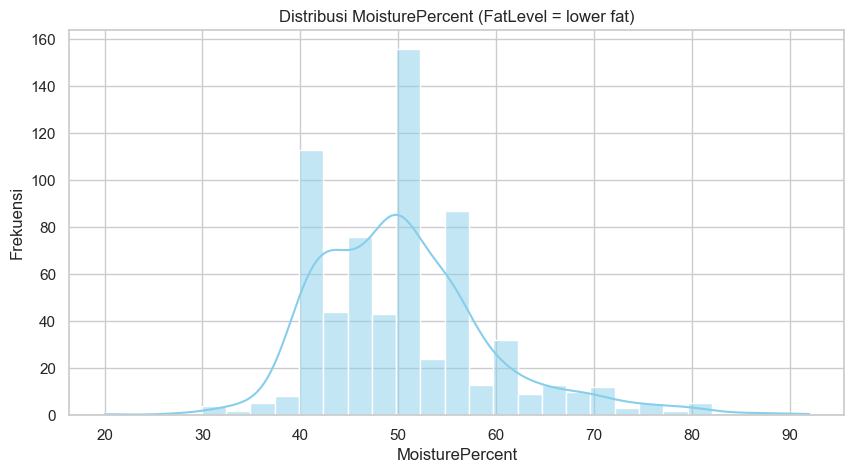

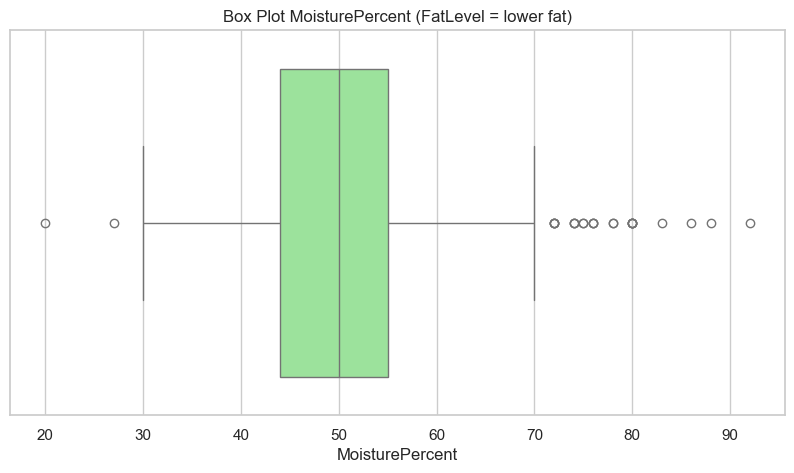

In [41]:
# Filter data untuk FatLevel = 'lower fat'
lower_fat_df = df[df['FatLevel'] == 'lower fat']

# Nama kolom numerik yang akan divisualisasikan
nama_kolom_numerik = 'MoisturePercent'

# 1. Visualisasi distribusi dengan Histogram dan KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 5))
sns.histplot(data=lower_fat_df, x=nama_kolom_numerik, kde=True, color='skyblue')
plt.title(f'Distribusi {nama_kolom_numerik} (FatLevel = lower fat)')
plt.xlabel(nama_kolom_numerik)
plt.ylabel('Frekuensi')
plt.show()

# 2. Visualisasi dengan Box Plot untuk melihat sebaran data dan outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=lower_fat_df, x=nama_kolom_numerik, color='lightgreen')
plt.title(f'Box Plot {nama_kolom_numerik} (FatLevel = lower fat)')
plt.xlabel(nama_kolom_numerik)
plt.show()

# Higher Fat

In [42]:
# Filter hanya data dengan FatLevel = 'higher fat'
higher_fat_df = df[df['FatLevel'] == 'higher fat']

# 1. Melihat 5 baris pertama data
print("Lima baris pertama data (FatLevel = 'higher fat'):")
display(higher_fat_df.head())

# 2. Melihat 5 baris terakhir data
print("\nLima baris terakhir data (FatLevel = 'higher fat'):")
display(higher_fat_df.tail())

# 3. Mengecek dimensi data
print(f"\nDataset 'higher fat' memiliki {higher_fat_df.shape[0]} baris dan {higher_fat_df.shape[1]} kolom.")

# 4. Ringkasan teknis (info)
print("\nInformasi teknis dataset 'higher fat' (df.info()):")
higher_fat_df.info()

# 5. Statistik deskriptif kolom numerik
print("\nStatistik deskriptif kolom numerik (FatLevel = 'higher fat'):")
display(higher_fat_df.describe())

# 6. Statistik deskriptif kolom kategorikal
print("\nStatistik deskriptif kolom kategorikal (FatLevel = 'higher fat'):")
display(higher_fat_df.describe(include=['object', 'category']))

# 7. Jumlah nilai yang hilang per kolom
print("\nJumlah nilai yang hilang per kolom (FatLevel = 'higher fat'):")
print(higher_fat_df.isnull().sum())

# 8. Modus (nilai paling sering muncul) untuk tiap kolom
print("\nModus untuk setiap kolom (FatLevel = 'higher fat'):")
display(higher_fat_df.mode().iloc[0])



Lima baris pertama data (FatLevel = 'higher fat'):


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
11,414,BC,Farmstead,34.0,NaN,Organic. Made with Jersey Milk as such very ri...,1,Semi-soft Cheese,Cow,Raw Milk,NaN,Gouda (Jerseyland Organic),higher fat
12,415,BC,Farmstead,34.0,NaN,Organic. No dye/colour added. Made from Jerse...,1,Semi-soft Cheese,Cow,Raw Milk,NaN,Cheddar (Jerseyland Organic),higher fat
13,416,BC,Farmstead,33.0,NaN,Organic. Our grana's are Parmesan and Asiago; ...,1,Hard Cheese,Cow,Raw Milk,NaN,Grana (Jerseyland Organic),higher fat
14,417,BC,Farmstead,43.0,Creamy and rich tasting. Creamy in colour due...,Organic. Made with Jersey milk,1,Soft Cheese,Cow,Raw Milk,NaN,Feta (Jerseyland Organic),higher fat
15,418,BC,Farmstead,34.0,"Available : Plain , garlic and dill, mixed herbs",Organic,1,Semi-soft Cheese,Goat,Raw Milk,NaN,Udderly Organic Goat Gouda (Jerseyland Organic),higher fat



Lima baris terakhir data (FatLevel = 'higher fat'):


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
1030,2380,AB,Artisan,40.0,"Smoky, buttery and creamy lactic flavor",Daily Fresh,0,Firm Cheese,Cow,Pasteurized,No Rind,Smoky/Smoke Cheddar (Apple Wood),higher fat
1037,2387,NS,Farmstead,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",Fresh curds through a variety of added Organic...,1,Hard Cheese,Cow,Pasteurized,NaN,Knoydart,higher fat
1039,2389,NS,Artisan,40.0,Grassy tang and restrained saltiness that refl...,NaN,0,Veined Cheeses,Ewe,Thermised,NaN,Electric Blue,higher fat
1040,2390,NS,Artisan,34.0,Sweet and tangy flavours combine with hoppy no...,NaN,0,Semi-soft Cheese,Ewe,Thermised,Washed Rind,Hip Hop,higher fat
1041,2391,AB,Artisan,31.5,"Available in different flavor: original, herb ...",Soft Squeaky Fresh Cheese.,0,Fresh Cheese,Cow,Pasteurized,No Rind,Super Fresh Cheese Curds,higher fat



Dataset 'higher fat' memiliki 358 baris dan 13 kolom.

Informasi teknis dataset 'higher fat' (df.info()):
<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 11 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              358 non-null    int64  
 1   ManufacturerProvCode  358 non-null    object 
 2   ManufacturingTypeEn   358 non-null    object 
 3   MoisturePercent       356 non-null    float64
 4   FlavourEn             270 non-null    object 
 5   CharacteristicsEn     212 non-null    object 
 6   Organic               358 non-null    int64  
 7   CategoryTypeEn        351 non-null    object 
 8   MilkTypeEn            357 non-null    object 
 9   MilkTreatmentTypeEn   334 non-null    object 
 10  RindTypeEn            243 non-null    object 
 11  CheeseName            358 non-null    object 
 12  FatLevel              358 non-null    object 
dtypes: float64(1), int64(

,CheeseId,MoisturePercent,Organic
count,358.000000,356.000000,358.000000
mean,1555.195531,40.543539,0.128492
std,486.452638,6.714935,0.335105
min,414.000000,12.000000,0.000000
25%,1204.500000,38.000000,0.000000
50%,1559.500000,39.000000,0.000000
75%,1929.500000,44.250000,0.000000
max,2391.000000,68.000000,1.000000



Statistik deskriptif kolom kategorikal (FatLevel = 'higher fat'):


,ManufacturerProvCode,ManufacturingTypeEn,FlavourEn,CharacteristicsEn,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,358,358,270,212,351,357,334,243,358,358
unique,9,3,224,182,6,6,3,4,356,1
top,QC,Artisan,Mild,Creamy-colored,Firm Cheese,Cow,Pasteurized,No Rind,Ménestrel (Le),higher fat
freq,265,143,11,9,197,297,231,150,2,358



Jumlah nilai yang hilang per kolom (FatLevel = 'higher fat'):
CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent           2
FlavourEn                88
CharacteristicsEn       146
Organic                   0
CategoryTypeEn            7
MilkTypeEn                1
MilkTreatmentTypeEn      24
RindTypeEn              115
CheeseName                0
FatLevel                  0
dtype: int64

Modus untuk setiap kolom (FatLevel = 'higher fat'):


CheeseId                           414
ManufacturerProvCode                QC
ManufacturingTypeEn            Artisan
MoisturePercent                   39.0
FlavourEn                         Mild
CharacteristicsEn       Creamy-colored
Organic                            0.0
CategoryTypeEn             Firm Cheese
MilkTypeEn                         Cow
MilkTreatmentTypeEn        Pasteurized
RindTypeEn                     No Rind
CheeseName                  Boerenkaas
FatLevel                    higher fat
Name: 0, dtype: object

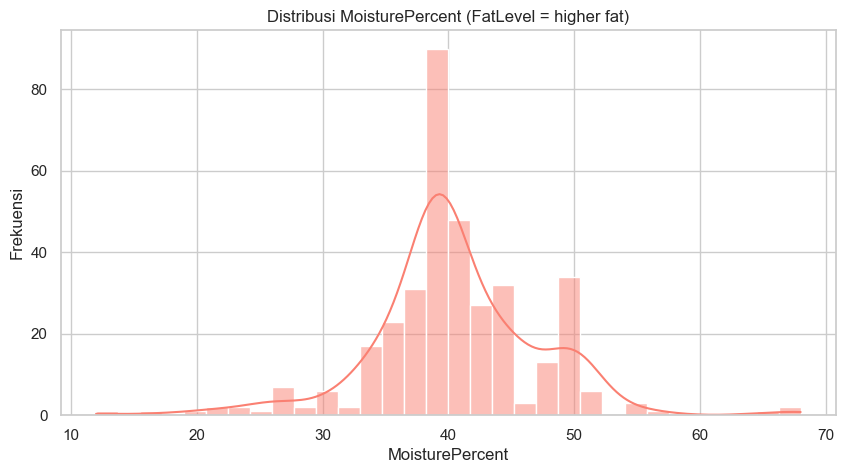

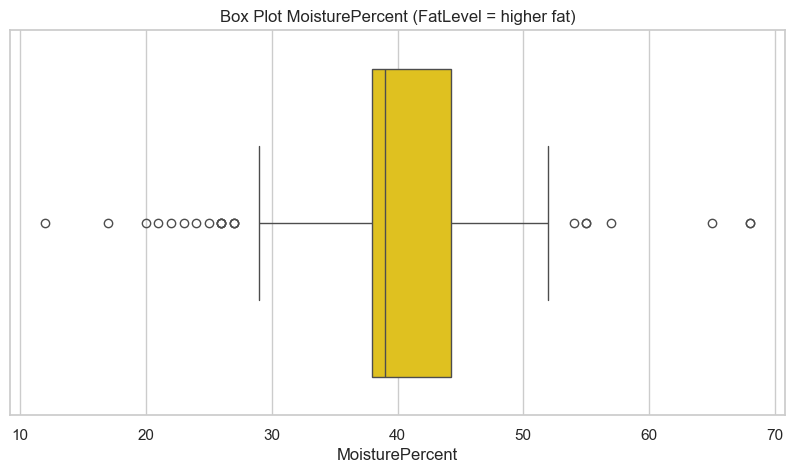

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk FatLevel = 'higher fat'
higher_fat_df = df[df['FatLevel'] == 'higher fat']

# Nama kolom numerik yang akan divisualisasikan
nama_kolom_numerik = 'MoisturePercent'

# 1. Visualisasi distribusi dengan Histogram dan KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 5))
sns.histplot(data=higher_fat_df, x=nama_kolom_numerik, kde=True, color='salmon')
plt.title(f'Distribusi {nama_kolom_numerik} (FatLevel = higher fat)')
plt.xlabel(nama_kolom_numerik)
plt.ylabel('Frekuensi')
plt.show()

# 2. Visualisasi dengan Box Plot untuk melihat sebaran data dan outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=higher_fat_df, x=nama_kolom_numerik, color='gold')
plt.title(f'Box Plot {nama_kolom_numerik} (FatLevel = higher fat)')
plt.xlabel(nama_kolom_numerik)
plt.show()


In [44]:
print(df['CheeseId'].nunique())


1042


# Dari hasil EDA selain pada data teks didapatkan bahwa
### Untuk Keseluruhan fitur tidak ada value yang typo, pada moisturier percent rentangnya jelas dari 12-92 yang masih diantar 1-100 %, dan juga ftiur kategorikal sepertinya dinputkan dengan drop list sehingga tidak ada typo.
### ada 4 chese name yang sama, namun 2 diantaranya sepertinya beda di olahannya, maksudnya satu dibuat di pabrik satu di buat secara rumahan, seperti keripik singkong, ada yang dijual di pinggir jalan ada yang di bungkus dalam brand bernama qtella namun dua daunya kripik singkong, ada 2 lagi yang seperti ke double dalam pengisian data
### hasil pada grafik keselutuhan untuk mositurizer terlihat ada 2 puncak/ 2 gunung yaitu puncak pada sekitar 38-40 dan 50-53, setelah di pecah menjadi lower dan higher fat pembagian gunung ini makin terlihat jelas dimana. puncak pertama 40an itu adalah milik higher artinya banyak data berlable higher memilik moisturizer sekitar 30 higga 50 tapi penumpukan terjadi di 37-42. sedangkan lower fat 40 hingga 55 dengan puncak 50-53. 

In [45]:
#Total kata di flavor dan character yang uniq
# flavor


# Set stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# Ambil data dari kolom FlavourEn, gabungkan, dan bersihkan
all_flavour_text = " ".join(df['FlavourEn'].dropna()).lower()
no_punct_flavour = all_flavour_text.translate(str.maketrans('', '', string.punctuation))
tokens = no_punct_flavour.split()

# Hapus stopwords
filtered_tokens = [word for word in tokens if word not in stop_words]

# Ambil kata-kata unik
unique_flavour_words = set(filtered_tokens)

# Tampilkan hasil
print("Kata-kata unik di kolom FlavourEn (tanpa stopwords):")
print(unique_flavour_words)
print(f"\nTotal kata unik: {len(unique_flavour_words)}")

Kata-kata unik di kolom FlavourEn (tanpa stopwords):
{'freshly', 'bloomy', 'becomes', 'combine', 'creamy', 'emmentallike', 'mediterranean', 'fresh', 'stronger', 'maple', 'chestnuts', 'due', 'fines', 'balkan', 'chanterelle', 'versions', 'habanero', 'espresso', 'aged', 'grand', 'hardly', 'winey', 'bbq', 'fine', 'fungus', 'cut', 'cracked', 'blue', 'tomatoes', 'lime', 'pungent', 'imparted', 'caramelized', 'wasabi', 'mild', 'tomato', 'certain', 'hint', 'lovely', 'leaves', 'neutral', '2', 'complex', 'etc', 'middle', 'chocolate', 'strong', 'richer', 'mix', 'fruity', 'olives', 'onions', 'medium', 'little', 'provolone', 'indian', 'mushroom', 'caprine', 'notes', 'cider', 'acidic', 'clover', 'sea', 'dark', 'hay', 'smoked', 'ending', 'rich', 'truffle', 'chive', 'jersey', 'hazelnut', 'overly', 'complexity', 'subtle', 'sweeter', 'roasted', 'also', 'flavored', 'deep', 'natural', 'chestnut', 'gives', 'agreable', 'honey', 'different', 'tangier', 'robust', 'slightly', 'bodied', 'becoming', 'lighter', 'd

In [46]:
# character

# Ambil data dari kolom CharacteristicsEn, gabungkan, dan bersihkan
all_character_text = " ".join(df['CharacteristicsEn'].dropna()).lower()
no_punct_character = all_character_text.translate(str.maketrans('', '', string.punctuation))
tokens = no_punct_character.split()

# Hapus stopwords
filtered_tokens = [word for word in tokens if word not in stop_words]

# Ambil kata-kata unik
unique_character_words = set(filtered_tokens)

# Tampilkan hasil
print("Kata-kata unik di kolom CharacteristicsEn (tanpa stopwords):")
print(unique_character_words)
print(f"\nTotal kata unik: {len(unique_character_words)}")

Kata-kata unik di kolom CharacteristicsEn (tanpa stopwords):
{'est', 'triple', 'washed', 'duvet', '20', 'italy', 'bloomy', 'textured', 'orangecolored', 'amber', 'becomes', 'muenster', 'creamy', 'colored', 'interiorripened', 'temperature', 'creamcolored', 'asiago', 'camemberttype', 'blé', 'ronds', 'fresh', 'stronger', 'maple', 'compact', 'canadian', 'aging', 'carbon', 'sliced', 'ages', 'grains', 'dans', 'geotrichum', 'coppercolored', 'balkan', 'yogurtlike', 'aged', 'hardly', 'ivry', 'veined', 'fine', '9', 'feta', 'kaymak', 'granas', 'regular', 'caciocavallo', 'shows', 'cut', 'humid', 'blue', 'specks', 'moist', 'ivory', 'daily', 'presents', 'porous', 'maritime', 'created', 'mild', 'bloom', 'yellowycreamy', 'hint', 'pasteurized', 'substances', 'complex', 'coloured', 'finement', 'whole', 'stiltonstyle', 'yeux', 'cheddartype', 'middle', 'du', 'strong', 'twisted', 'mix', 'sa', 'fruity', 'gourdshaped', 'beigecolored', 'medium', 'little', 'mushroom', 'prickled', 'water', 'notes', 'cider', 'ayr

### Kata Yang ada di flavor dan character bersamaan

In [47]:

# Set stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk membersihkan teks: lowercase, hapus tanda baca, hapus stopwords
def clean_text_column(series):
    all_text = " ".join(series.dropna()).lower()
    no_punct = all_text.translate(str.maketrans('', '', string.punctuation))
    words = no_punct.split()
    filtered = [word for word in words if word not in stop_words]
    return set(filtered)

# Bersihkan dan ambil kata unik dari masing-masing kolom
flavour_words = clean_text_column(df['FlavourEn'])
character_words = clean_text_column(df['CharacteristicsEn'])

# Cari kata yang muncul di kedua kolom
common_words = flavour_words.intersection(character_words)

# Tampilkan hasil
print("Kata yang muncul di kedua kolom (tanpa stopwords):")
print(common_words)
print(f"\nTotal kata yang muncul di kedua kolom: {len(common_words)}")

Kata yang muncul di kedua kolom (tanpa stopwords):
{'good', 'yellow', 'extra', 'firmer', 'full', 'bloomy', 'rind', 'curds', 'soft', 'becomes', '6', 'creamy', 'neither', 'rather', '3', 'mellow', 'brine', 'mixed', 'woody', 'fresh', 'stronger', 'maple', 'cheddar', 'like', 'damp', 'milder', 'sweet', 'organic', 'colour', 'balkan', 'bitter', 'apple', 'whey', 'aged', 'hardly', 'velvety', 'tangy', 'cheddars', 'ash', 'delicate', 'fine', 'spices', 'blocks', 'texture', 'refreshing', 'cut', 'blue', 'slight', 'style', 'months', 'years', 'melt', 'reminiscent', 'almond', 'mild', 'hint', 'nut', 'green', 'eastern', 'red', 'complex', 'goat', 'vegetable', 'salty', 'sunflower', 'flower', 'distinctive', 'cheeses', 'original', 'middle', '5', 'flavours', 'strong', 'mix', 'light', 'fruity', 'parmesan', 'dill', 'brie', 'acidulous', 'without', 'marble', 'oil', 'plain', 'finish', 'medium', 'buttery', 'little', 'italian', 'free', 'taste', 'mushroom', 'age', 'herbs', 'garlic', 'notes', 'cider', 'wood', 'pepper', '

#### pada kolom flavour menjelaskan tentang rasa dari keju sedangkang characteristic menjelaskan karakter yang pepmbuat keju menjadi beda. Menurut Kamus Besar Bahasa Indonesia (KBBI), rasa adalah tanggapan indra terhadap rangsangan saraf, seperti rasa manis, pahit, asam, dan asin. Rasa juga dapat mengacu pada sensasi panas, dingin, maupun nyeri, serta tanggapan emosional terhadap suatu pengalaman. Dalam ranah ilmu pangan, rasa lebih spesifik menunjuk pada sensasi yang langsung dirasakan oleh lidah melalui lima rasa dasar yaitu manis, asin, asam, pahit, dan umami. Menurut KBBI, karakteristik berarti mempunyai sifat khas sesuai dengan perwatakan tertentu. Dalam konteks produk pangan seperti keju, karakteristik mencakup berbagai aspek sensorik dan fisik, seperti rasa, aroma, warna, tekstur, kelembutan, dan bentuk. Karakteristik ini membentuk identitas produk dan menjadi acuan penting dalam penilaian mutu dan preferensi konsumen. sehingga tidak heran banyak yang sama dari kolom flavor dan characteristic ini. sehingga kedua fitur ini akan di satukan dan diolah menjadi fitur fitur baru. 